<a href="https://colab.research.google.com/github/thaohung13/AI_W9_31_3_2023/blob/main/FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import load_img
from keras.utils import img_to_array
from keras.datasets import fashion_mnist
from keras.models import Sequential #Sequnetial: la mang ANN, lop nay nos ke tiep nhau (mo ta mang ANN theo tung lop)
from keras.models import load_model
from keras.layers import Dense# Dense = full_connectied : ket noi day du theo cac te bao
from keras.utils import to_categorical #Onehot encoding convert

import matplotlib.pyplot as plt
from PIL import Image
from pylab import *

In [69]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_images.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000, 28, 28)


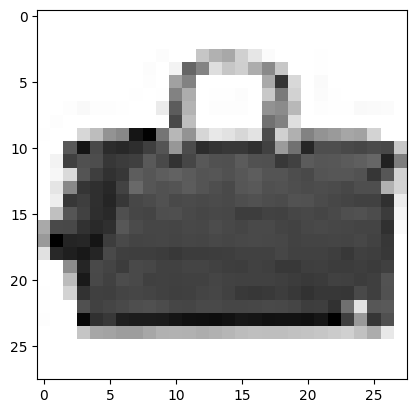

Cái này là: 8


In [70]:
hinh = train_images[99]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print("Cái này là:", train_labels[99])

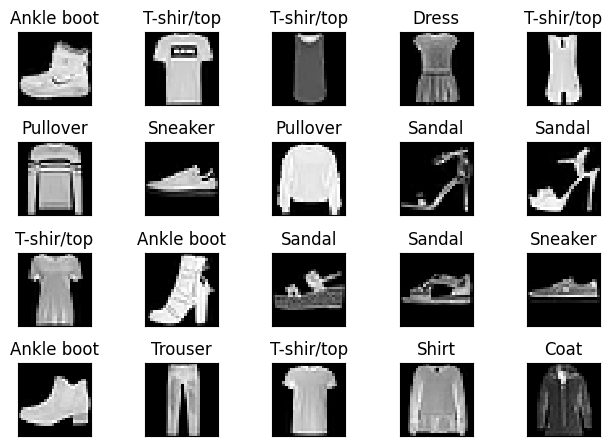

In [71]:
class_name = [ "T-shir/top" ,"Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
for i in range(20): 
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray', interpolation = 'none')
  plt.title('{}'.format(class_name[train_labels[i]]))
  plt.xticks([])
  plt.yticks([])

In [72]:
from keras.models import Sequential #Sequnetial: la mang ANN, lop nay nos ke tiep nhau (mo ta mang ANN theo tung lop)
from keras.layers import Dense  # Dense = full_connectied : ket noi day du theo cac te bao 

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (28*28,),))  # them mot lop: add, them mot full_connectied: Dense, 512: so noron duoc them 
model.add(Dense(1024, activation = 'relu')) 
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))      
model.add(Dense(10, activation = 'softmax')) 

model.summary() 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 512)               401920    
                                                                 
 dense_42 (Dense)            (None, 1024)              525312    
                                                                 
 dense_43 (Dense)            (None, 512)               524800    
                                                                 
 dense_44 (Dense)            (None, 256)               131328    
                                                                 
 dense_45 (Dense)            (None, 128)               32896     
                                                                 
 dense_46 (Dense)            (None, 64)                8256      
                                                                 
 dense_47 (Dense)            (None, 32)               

In [73]:
train_images = train_images.reshape((60000,28*28))  #reshape: chuyen anh 2 chieu sang anh 1 chieu 
train_images = train_images.astype('float32')/255
train_images.shape

(60000, 784)

In [74]:
test_images = test_images.reshape((10000,28*28))  #reshape: chuyen anh 2 chieu sang anh 1 chieu 
test_images = test_images.astype('float32')/255
test_images.shape

(10000, 784)

In [75]:
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)
train_labels.shape

(60000, 10)

In [76]:
test_labels.shape 

(10000, 10)

In [77]:
#compile
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])  #chon bo toi uu, danh gia do mat mat, do chinh xac  
#train
model.fit(train_images, train_labels, epochs = 10, batch_size = 128 ) # epochs: so lan hoc, bath_size: so du lieu moi lan hoc
#evaluate
test_loss , test_acc = model.evaluate(test_images, test_labels)
print('Độ mất mát :', test_loss)
print('Độ chính xác :', test_acc)

Epoch 1/10
469/469 [==============================] - 20s 40ms/step - loss: 0.7950 - accuracy: 0.6915
Epoch 2/10
469/469 [==============================] - 20s 43ms/step - loss: 0.4476 - accuracy: 0.8367
Epoch 3/10
469/469 [==============================] - 20s 42ms/step - loss: 0.3893 - accuracy: 0.8574
Epoch 4/10
469/469 [==============================] - 22s 46ms/step - loss: 0.3527 - accuracy: 0.8710
Epoch 5/10
469/469 [==============================] - 19s 41ms/step - loss: 0.3308 - accuracy: 0.8790
Epoch 6/10
469/469 [==============================] - 20s 43ms/step - loss: 0.3112 - accuracy: 0.8863
Epoch 7/10
469/469 [==============================] - 19s 40ms/step - loss: 0.2973 - accuracy: 0.8883
Epoch 8/10
469/469 [==============================] - 20s 43ms/step - loss: 0.2865 - accuracy: 0.8946
Epoch 9/10
469/469 [==============================] - 19s 41ms/step - loss: 0.2749 - accuracy: 0.8983
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 0.3592 

In [79]:
model.save('fashion_mnist.h5')

1/1 [==============================] - 0s 111ms/step


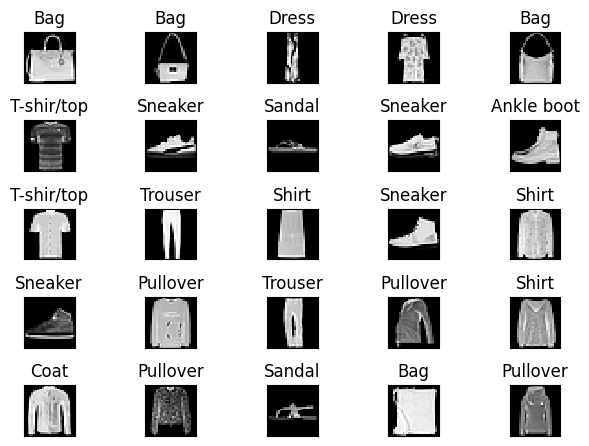

In [78]:
x_images = test_images[30:55]
pred = np.argmax(model.predict(x_images), axis=-1)
x_images = np.reshape(x_images, (25,28,28,1))

for i in range(25): 
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_images[i], cmap = 'gray', interpolation = 'none')
  plt.title('{}'.format(class_name[pred[i]]))
  plt.xticks([])
  plt.yticks([])